<a href="https://colab.research.google.com/github/Aleksandra0001/DataScience/blob/main/Hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1




In [9]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [173]:
import matplotlib
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, round, sum, desc, count, min, avg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

В этом задании вам потребуется скачать вот [этот](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019?resource=download) датасет. 

In [146]:
dwn_url='/content/bestsellers with categories.csv'

1. Создать спарк сессию.

2. Прочитать датасет в датафрейм.

In [147]:
spark_session = SparkSession.builder.getOrCreate()
df = spark_session.read.options(header=True, inferSchema=True).csv(dwn_url)

for el in df.columns:
  df = df.withColumnRenamed(el, el.lower())
df.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                name|              author|user rating|reviews|price|year|      genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [148]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- author: string (nullable = true)
 |-- user rating: double (nullable = true)
 |-- reviews: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- genre: string (nullable = true)



3. Используя только RDD вычислить среднюю цену всех книг, у которых рейтинг выше 4.7


In [149]:
df.show(1)

+--------------------+--------+-----------+-------+-----+----+-----------+
|                name|  author|user rating|reviews|price|year|      genre|
+--------------------+--------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
+--------------------+--------+-----------+-------+-----+----+-----------+
only showing top 1 row



In [150]:
df.filter(df['user rating'] > 4.7)\
.select(round(mean('price'),2).alias('average_price')).show(truncate=False)

+-------------+
|average_price|
+-------------+
|10.7         |
+-------------+



4. Построить гистограмму распределения рецензий (столбец Reviews).


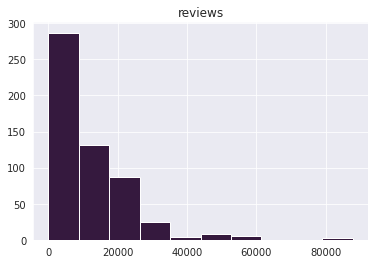

In [151]:
pandas_frame = df.toPandas()
pandas_frame.hist('reviews');

5. Построить матрицу корреляции для столбцов "User Rating", "Reviews" и "Price".


In [152]:
df_corr = df.select(['user rating', 'reviews', 'price']).toPandas()
corr_m = df_corr.corr()
corr_m.style.background_gradient(axis=0, subset=['user rating', 'reviews', 'price'], cmap='YlOrRd')

,user rating,reviews,price
user rating,1.000000,-0.001729,-0.133086
reviews,-0.001729,1.000000,-0.109182
price,-0.133086,-0.109182,1.000000


6. Используя библиотеку seaborn построить парные графики (pairplots) столбцов "User Rating", "Reviews" и "Price".


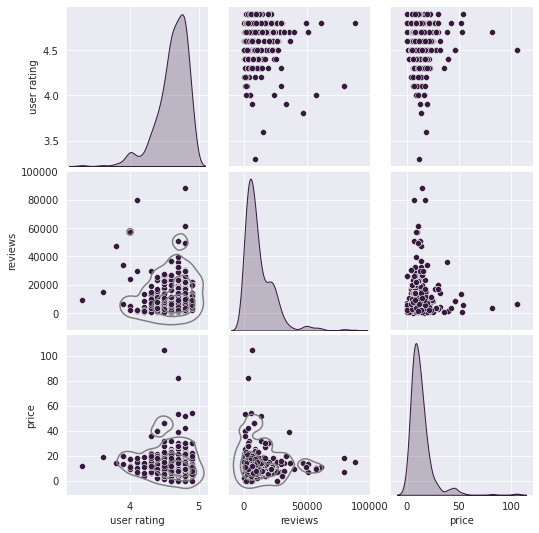

In [153]:
df_pairplot = df.select(['user rating', 'reviews', 'price']).toPandas()
sns.set_style('darkgrid')
sns.set_palette("rocket")
g = sns.pairplot(df_pairplot, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color="0.5");

# Задание 2

1. Найдите автора с самым высоким рейтингом.

In [154]:
df.sort(df['user rating'].desc()).show(1)

+--------------------+---------------+-----------+-------+-----+----+-------+
|                name|         author|user rating|reviews|price|year|  genre|
+--------------------+---------------+-----------+-------+-----+----+-------+
|Brown Bear, Brown...|Bill Martin Jr.|        4.9|  14344|    5|2017|Fiction|
+--------------------+---------------+-----------+-------+-----+----+-------+
only showing top 1 row



2. Найдите трех авторов с самым низким рейтингом.

In [155]:
df.sort('user rating').show(3)

+--------------------+------------+-----------+-------+-----+----+-------+
|                name|      author|user rating|reviews|price|year|  genre|
+--------------------+------------+-----------+-------+-----+----+-------+
|  The Casual Vacancy|J.K. Rowling|        3.3|   9372|   12|2012|Fiction|
|Go Set a Watchman...|  Harper Lee|        3.6|  14982|   19|2015|Fiction|
|Fifty Shades of G...|   E L James|        3.8|  47265|   14|2012|Fiction|
+--------------------+------------+-----------+-------+-----+----+-------+
only showing top 3 rows



3. Определите какой автор получил наибольшее количество рецензий.

In [156]:
df.groupBy('author').agg(sum('reviews').alias('reviews')).sort(desc('reviews')).show(1)

+---------------+-------+
|         author|reviews|
+---------------+-------+
|Suzanne Collins| 278329|
+---------------+-------+
only showing top 1 row



4. Определите какой автор написал наибольшее количество книг за весь доступный в данных период.


In [157]:
df.groupBy('author').agg(count('name').alias('book')).sort(desc('book')).show(1)

+-----------+----+
|     author|book|
+-----------+----+
|Jeff Kinney|  12|
+-----------+----+
only showing top 1 row



5. Определите какая книга жанра "Fiction" имеет самый маленький рейтинг.


In [158]:
df.select('name','genre','user rating').filter("genre=='Fiction'").sort('user rating').show(1)

+------------------+-------+-----------+
|              name|  genre|user rating|
+------------------+-------+-----------+
|The Casual Vacancy|Fiction|        3.3|
+------------------+-------+-----------+
only showing top 1 row



6. Определите какая книга жанра "Non Fiction" имеет самый высокий рейтинг.


In [159]:
df.select('name','genre','user rating').filter("genre=='Non Fiction'").sort(desc('user rating')).show(1)

+--------------------+-----------+-----------+
|                name|      genre|user rating|
+--------------------+-----------+-----------+
|Hamilton: The Rev...|Non Fiction|        4.9|
+--------------------+-----------+-----------+
only showing top 1 row



# Задание 3


Постройте гистограмму среднего количества рецензий по годам.

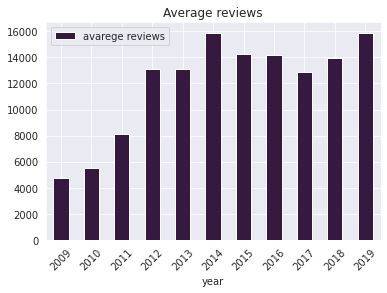

In [177]:
avg_reviews=df.groupBy('year').agg(avg('reviews').alias('avarege reviews')).sort('year')
avg_reviews.toPandas().plot(x='year', y='avarege reviews', kind='bar')
plt.title('Average reviews')
plt.xticks(rotation=45)
plt.show();

 В виде отдельной гистограммы визуализируйте количество книг жанра "Fiction" и "Non Fiction" за весь доступный период.


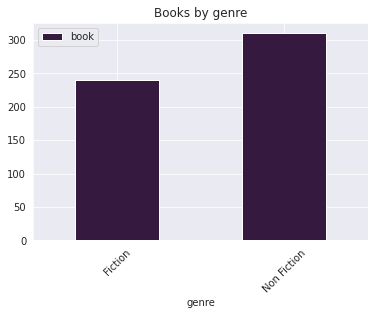

In [180]:
books_by_genre=df.groupBy('genre').agg(count('name').alias('book'))
books_by_genre.toPandas().plot(x='genre', y='book', kind='bar')
plt.title('Books by genre')
plt.xticks(rotation=45)
plt.show();